# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

shape of the training set: (50000, 32, 32, 3)
shape of the test set: (10000, 32, 32, 3)
dimensions of the images: (32, 32, 3)
number of classes: 100


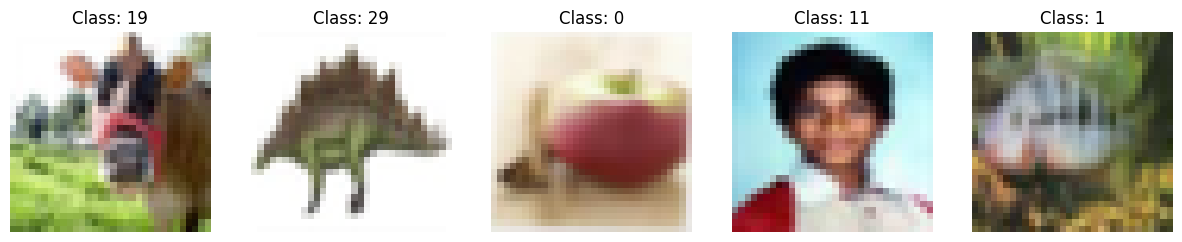

In [2]:
# Your code here
import numpy as np
print("shape of the training set: " + str(x_train.shape))
print("shape of the test set: " + str(x_test.shape))
print("dimensions of the images: " + str(x_train.shape[1:]))
print("number of classes: " + str(len(np.unique(y_train))))
import matplotlib.pyplot as plt
num_examples = 5
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
for i in range(num_examples):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Class: {y_train[i][0]}')
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Your code here

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_test[0]

array([[[0.78039217, 0.84313726, 0.9764706 ],
        [0.76862746, 0.827451  , 0.95686275],
        [0.7647059 , 0.8235294 , 0.9529412 ],
        ...,
        [0.84705883, 0.90588236, 0.98039216],
        [0.8509804 , 0.90588236, 0.98039216],
        [0.8784314 , 0.91764706, 0.9882353 ]],

       [[0.77254903, 0.8235294 , 0.9372549 ],
        [0.7647059 , 0.8156863 , 0.93333334],
        [0.7647059 , 0.8235294 , 0.9411765 ],
        ...,
        [0.90588236, 0.9529412 , 0.98039216],
        [0.9137255 , 0.9529412 , 0.98039216],
        [0.94509804, 0.9607843 , 0.99215686]],

       [[0.87058824, 0.8862745 , 0.9647059 ],
        [0.8352941 , 0.8627451 , 0.9490196 ],
        [0.81960785, 0.85882354, 0.9529412 ],
        ...,
        [0.9529412 , 0.98039216, 0.9843137 ],
        [0.95686275, 0.9764706 , 0.9843137 ],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235295, 0.28627452, 0.3882353 ],
        [0.2784314 , 0.2901961 , 0.4       ],
        [0.2901961 , 0

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal, Constant

# Your code here

model = Sequential()

# Con layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Con layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Con layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Dense 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,345,540 (5.13 MB)

 Trainable params: 1,345,540 (5.13 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy measures the difference between the predicted probability distribution and the true distribution, which is ideal for multi-class classification problems.
- <b>Optimizer:</b> Adam is a popular choice because it adjusts the learning rate automatically and works efficiently.

In [5]:
from keras import optimizers

# Your code here
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
# Your code here
import tensorflow as tf
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.0129 - loss: 4.5533 - val_accuracy: 0.0663 - val_loss: 4.0030
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.0753 - loss: 3.9590 - val_accuracy: 0.1464 - val_loss: 3.5721
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1405 - loss: 3.5986 - val_accuracy: 0.1934 - val_loss: 3.3602
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1856 - loss: 3.3694 - val_accuracy: 0.2104 - val_loss: 3.2370
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2120 - loss: 3.2124 - val_accuracy: 0.2451 - val_loss: 3.0600
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2346 - loss: 3.0771 - val_accuracy: 0.2568 - val_loss: 3.0066
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2557 - loss: 2.9800 - val_accuracy: 0.2636 - val_loss: 3.0130
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2842 - lo

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.302
- <b>Other metric:</b> Precision
- <b>Reason for selection:</b> Precision is useful in scenarios where you want to minimize false positives. This is especially important in multi-class classification to understand the model's performance on each class
- <b>Value of metric:</b> 0.318
- <b>Interpretation of metric value:</b> About 31.8% of the predictions made by the model are correct. This is relatively low.

In [7]:
# Your code here
from sklearn.metrics import precision_score


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: " + str(test_acc))
print("Test loss: " + str( test_loss))
print("Precision: " + str(precision))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 - 1s - 2ms/step - accuracy: 0.3025 - loss: 2.8034
Test accuracy: 0.30250000953674316
Test loss: 2.803438186645508
Precision: 0.31847995312339733


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

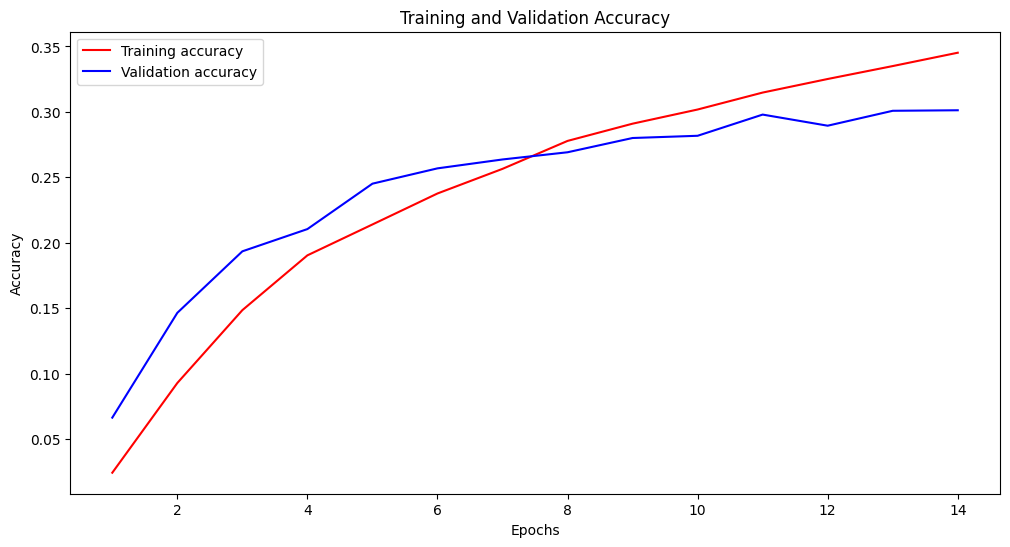

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


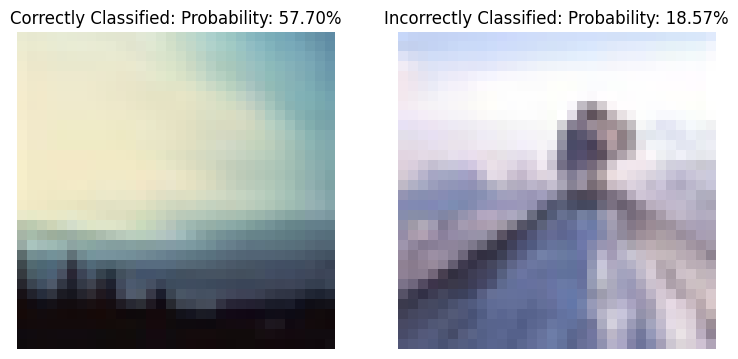

In [13]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test)

# Ensure you have `model` trained here

# Plot training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

correct_indices = np.where(y_pred_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(y_pred_classes != np.argmax(y_test, axis=1))[0]

correct_image_index = correct_indices[0]
incorrect_image_index = incorrect_indices[0]

_, class_names = cifar100.load_data(label_mode='fine')
class_names = class_names[0]

correct_image_class = class_names[y_pred_classes[correct_image_index]]
incorrect_image_class = class_names[y_pred_classes[incorrect_image_index]]

correct_image_probs = y_pred[correct_image_index]
incorrect_image_probs = y_pred[incorrect_image_index]

correct_image_pred_prob = correct_image_probs[y_pred_classes[correct_image_index]] * 100
incorrect_image_pred_prob = incorrect_image_probs[y_pred_classes[incorrect_image_index]] * 100

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_image_index])
plt.title(f'Correctly Classified: Probability: {correct_image_pred_prob:.2f}%')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_image_index])
plt.title(f'Incorrectly Classified: Probability: {incorrect_image_pred_prob:.2f}%')
plt.axis('off')

plt.show()





## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
# Your code here
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal, Constant

model = Sequential()

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
                             epsilon=0.005,
                             beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
                             gamma_initializer=Constant(value=0.9)))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 512)           │              

 Total params: 15,795,556 (60.26 MB)

 Trainable params: 15,786,340 (60.22 MB)

 Non-trainable params: 9,216 (36.00 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [15]:
# Your code here
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
train_datagen.fit(X_train)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=3,
    verbose=1,
    restore_best_weights=True,
    baseline=0.55
)

history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=100,
          validation_data=(X_validation, y_validation),
          verbose=1,
          callbacks=[early_stopping])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - acc: 0.0289 - loss: 4.8875 - val_acc: 0.0104 - val_loss: 4.7348
Epoch 2/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - acc: 0.0469 - loss: 4.4761

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss,val_acc,val_loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - acc: 0.0606 - loss: 4.3956 - val_acc: 0.0088 - val_loss: 4.9526
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - acc: 0.0842 - loss: 4.1343 - val_acc: 0.0161 - val_loss: 5.3758
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - acc: 0.0998 - loss: 4.0017 - val_acc: 0.0310 - val_loss: 5.1722
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - acc: 0.1232 - loss: 3.8031 - val_acc: 0.0551 - val_loss: 4.6321
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - acc: 0.1366 - loss: 3.6953 - val_acc: 0.1193 - val_loss: 3.8444
Epoch 7/100
 25/100 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - acc: 0.1704 - loss: 3.5561

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - acc: 0.1701 - loss: 3.5780 - val_acc: 0.1243 - val_loss: 3.8304
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - acc: 0.1669 - loss: 3.5481 - val_acc: 0.1695 - val_loss: 3.5452
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - acc: 0.1851 - loss: 3.4677 - val_acc: 0.2186 - val_loss: 3.2770
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - acc: 0.1932 - loss: 3.3701 - val_acc: 0.2008 - val_loss: 3.3551
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - acc: 0.2078 - loss: 3.2822 - val_acc: 0.2017 - val_loss: 3.3614
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - acc: 0.2210 - loss: 3.2243 - val_acc: 0.2380 - val_loss: 3.1022
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - acc: 0.2320 - loss: 3.1264 - val_acc: 0.2600 - val_loss: 3.0212
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - acc: 0.2405 - loss: 3.0401 - val_acc: 0.2424 - val_loss: 3.1065
Epoch 15/100
100/100 ━━━━━━━━━━

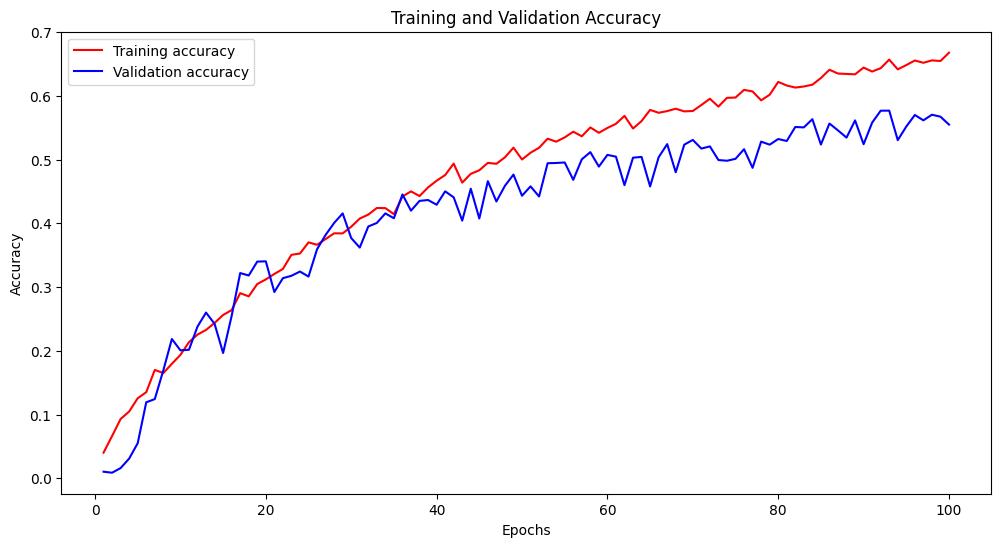

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step


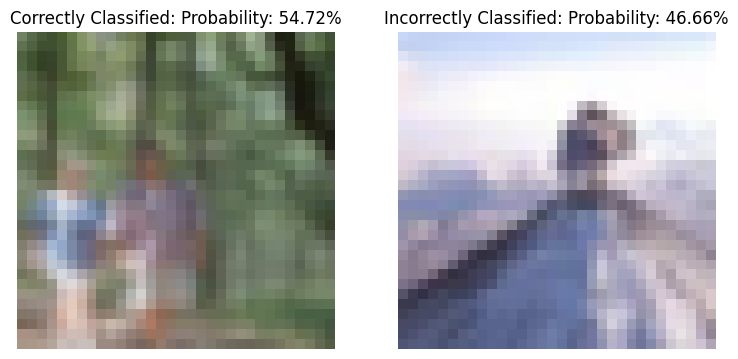

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test)

# Ensure you have `model` trained here

# Plot training and validation accuracy
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

correct_indices = np.where(y_pred_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(y_pred_classes != np.argmax(y_test, axis=1))[0]

correct_image_index = correct_indices[0]
incorrect_image_index = incorrect_indices[0]

_, class_names = cifar100.load_data(label_mode='fine')
class_names = class_names[0]

correct_image_class = class_names[y_pred_classes[correct_image_index]]
incorrect_image_class = class_names[y_pred_classes[incorrect_image_index]]

correct_image_probs = y_pred[correct_image_index]
incorrect_image_probs = y_pred[incorrect_image_index]

correct_image_pred_prob = correct_image_probs[y_pred_classes[correct_image_index]] * 100
incorrect_image_pred_prob = incorrect_image_probs[y_pred_classes[incorrect_image_index]] * 100

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_image_index])
plt.title(f'Correctly Classified: Probability: {correct_image_pred_prob:.2f}%')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_image_index])
plt.title(f'Incorrectly Classified: Probability: {incorrect_image_pred_prob:.2f}%')
plt.axis('off')

plt.show()



### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The first model is simpler, with fewer layers and no batch normalization. It may train faster and be easier to manage but might not capture complex patterns.
Second model is deeper and incorporates batch normalization and a more sophisticated architecture. This lead to better performance on complex datasets which we can see in accuracy level that is more then 55%. At the same time, it requires more computational resources.

For the CIFAR-100 dataset current performance reached out to 96% with EffNet-L2(SAM), so there are definitely room for further improvement.

As other techniques I can use: transferable learning, more robust data augmentation, hyper parameters selectors other architectural approaches, other regularization.



## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.